In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [87]:
df = pd.read_csv('IMDB_data_cleaned.csv')
df2 = df.copy()

In [88]:
df2.head()

,Title,Rating,Director,Gross,MPAA Rating,Users Reviews Count,Critics Reviews Count,Ratings Number,Oscar Awards,Total Wins,Total Nom,Year,After 2002
0,American Psycho,7.6,Mary Harron,34266564.0,R,1300,324,53500,0,8,13,2000,0
1,The Thing,8.1,John Carpenter,19632053.0,R,1200,374,39800,0,0,3,1982,0
2,Jaws,8.0,Steven Spielberg,471411300.0,PG,1300,283,56900,3,15,20,1975,0
3,Heat,8.2,Michael Mann,187436818.0,R,1200,225,61500,0,0,14,1995,0
4,Top Gun,6.9,Tony Scott,357288178.0,PG,557,208,31400,1,11,5,1986,0


In [89]:
df2.describe()

,Rating,Gross,Users Reviews Count,Critics Reviews Count,Ratings Number,Oscar Awards,Total Wins,Total Nom,Year,After 2002
count,2523.000000,2.523000e+03,2523.000000,2523.000000,2.523000e+03,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000
mean,6.991122,1.355889e+08,538.242172,196.884265,4.273805e+04,0.335711,12.632977,23.837099,1997.946889,0.494253
std,0.897795,2.282447e+08,740.558810,149.183461,1.876989e+05,1.037492,25.381203,39.960270,17.944191,0.500066
min,1.700000,2.000000e+00,3.000000,2.000000,2.220000e+02,0.000000,0.000000,0.000000,1920.000000,0.000000
25%,6.500000,7.643693e+06,158.000000,88.000000,4.900000e+03,0.000000,1.000000,3.000000,1990.000000,0.000000
50%,7.100000,4.477920e+07,326.000000,153.000000,1.150000e+04,0.000000,4.000000,9.000000,2002.000000,0.000000
75%,7.600000,1.621945e+08,638.500000,268.000000,2.600000e+04,0.000000,13.000000,24.000000,2011.000000,1.000000
max,9.300000,2.847246e+09,11100.000000,843.000000,2.500000e+06,11.000000,306.000000,376.000000,2021.000000,1.000000


In [90]:
df2['MPAA Rating'].value_counts()

R            1131
PG-13         719
PG            324
Not Rated     171
G              47
Approved       45
Passed         41
TV-MA          14
Unrated         9
TV-14           6
TV-PG           4
NC-17           3
M               3
X               3
GP              2
M/PG            1
Name: MPAA Rating, dtype: int64

In [91]:
df2['MPAA Rating']=df2['MPAA Rating'].apply(lambda x: x.replace('TV-PG','PG').replace('GP','PG').replace('M','PG').replace('TV-MA','NC-17').replace('X','NC-17').replace('PG/PG','PG'))

In [92]:
df2.Director.value_counts().head(10)

Steven Spielberg     25
Clint Eastwood       20
Martin Scorsese      19
Ridley Scott         17
Tim Burton           15
John Carpenter       14
Alfred Hitchcock     14
Michael Bay          13
Quentin Tarantino    11
Joel Schumacher      11
Name: Director, dtype: int64

In [93]:
#directors with the highest rating, between the 30th most mentioned directors in the dataset  
top_direc = np.array(df2.Director.value_counts().head(30).keys())
df2[df2.Director.isin(top_direc)].groupby('Director').mean()['Rating'].sort_values(ascending=False).head(10)

Director
Christopher Nolan    8.163636
Billy Wilder         8.044444
Alfred Hitchcock     8.021429
Quentin Tarantino    7.872727
Joel Coen            7.787500
Martin Scorsese      7.757895
David Fincher        7.750000
Guy Ritchie          7.650000
Peter Jackson        7.590909
Steven Spielberg     7.556000
Name: Rating, dtype: float64

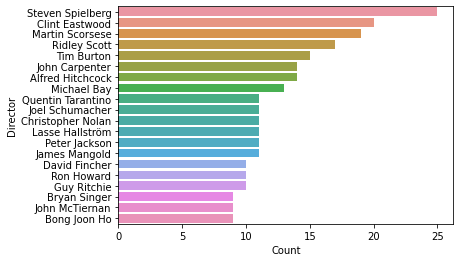

In [94]:
#most mentioned directors
sns.barplot(y=df2.Director.value_counts()[:20].index, x=df2.Director.value_counts()[:20])
plt.xlabel('Count')
plt.ylabel('Director');

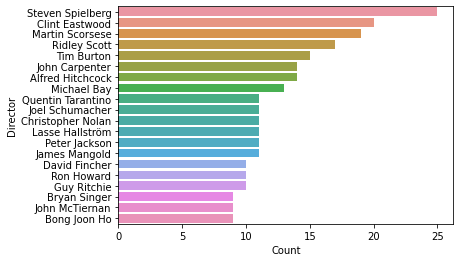

In [95]:
sns.barplot(y=df2.Director.value_counts()[:20].index, x=df2.Director.value_counts()[:20])
plt.xlabel('Count')
plt.ylabel('Director');

In [96]:
['Oscar Awards']

['Oscar Awards']

<AxesSubplot:xlabel='Oscar Awards', ylabel='Director'>

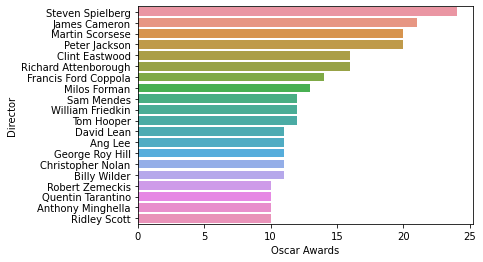

In [97]:
# directors that there movies had the same number of oscars
sns.barplot(y=df2.groupby('Director').sum()['Oscar Awards'].sort_values(ascending=False).keys()[:20], x=df2.groupby('Director').sum()['Oscar Awards'].sort_values(ascending=False)[:20])

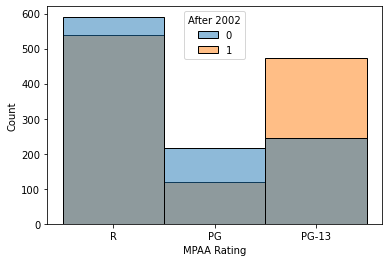

In [98]:
df_=df2[df2['MPAA Rating'].isin(df2['MPAA Rating'].value_counts()[:3].index)]
sns.histplot(x=df_['MPAA Rating'],hue = df_['After 2002']);

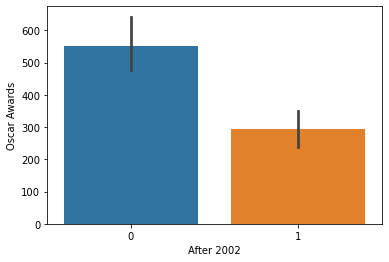

In [99]:
sns.barplot(x=df2['After 2002'], y=df2['Oscar Awards'],estimator=sum);

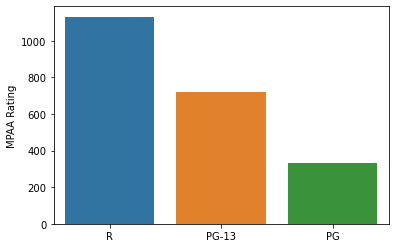

In [100]:
sns.barplot(x=df2['MPAA Rating'].value_counts()[:3].index, y=df2['MPAA Rating'].value_counts()[:3]);

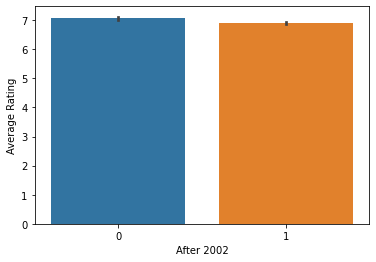

In [101]:
sns.barplot(x=df2['After 2002'], y=df2['Rating'])
plt.ylabel('Average Rating');

<AxesSubplot:>

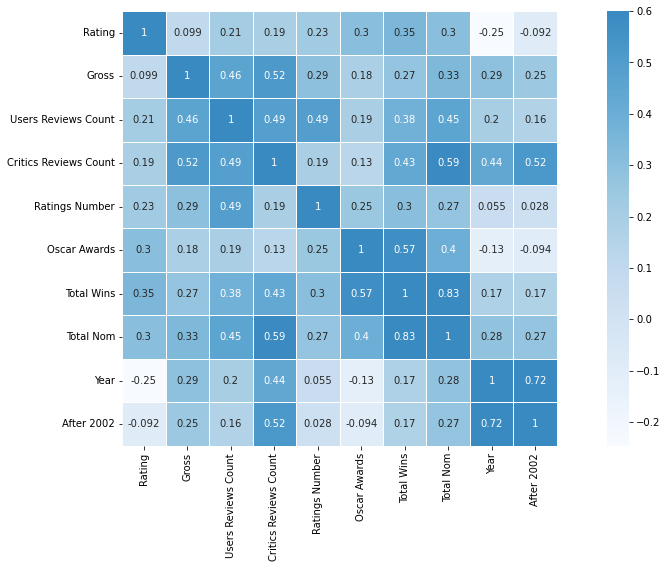

In [102]:
fig, ax =plt.subplots(figsize=(18,8))
sns.heatmap(df2.corr(),vmax=.6, center=0.4, cmap='Blues',
            square=True, linewidths=.5,annot=True) 

### Prepare for Model Building

In [103]:
Rating_encoded = pd.get_dummies(df2['MPAA Rating'])

In [104]:
df_final=df2.join(Rating_encoded, rsuffix='1')

In [105]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  2523 non-null   object 
 1   Rating                 2523 non-null   float64
 2   Director               2523 non-null   object 
 3   Gross                  2523 non-null   float64
 4   MPAA Rating            2523 non-null   object 
 5   Users Reviews Count    2523 non-null   int64  
 6   Critics Reviews Count  2523 non-null   int64  
 7   Ratings Number         2523 non-null   int64  
 8   Oscar Awards           2523 non-null   int64  
 9   Total Wins             2523 non-null   int64  
 10  Total Nom              2523 non-null   int64  
 11  Year                   2523 non-null   int64  
 12  After 2002             2523 non-null   int64  
 13  Approved               2523 non-null   uint8  
 14  G                      2523 non-null   uint8  
 15  NC-1

In [114]:
abs(df_final.corr()['Rating']).sort_values(ascending=False)

Rating                   1.000000
Total Wins               0.345507
Oscar Awards             0.302802
Total Nom                0.302511
Year                     0.246498
Ratings Number           0.231330
Users Reviews Count      0.214219
Critics Reviews Count    0.189698
PG-13                    0.159462
Not Rated                0.148647
Passed                   0.113026
Gross                    0.098905
After 2002               0.092495
Approved                 0.086072
G                        0.055248
PG                       0.015550
R                        0.011402
Name: Rating, dtype: float64

In [107]:
df_final['MPAA Rating'].value_counts()

R            1131
PG-13         719
PG            334
Not Rated     171
G              47
Approved       45
Passed         41
TV-PGA         14
Unrated         9
NC-17           6
TV-14           6
Name: MPAA Rating, dtype: int64

In [110]:
#drp column that are mostly zeros
df_final.drop(['NC-17','TV-14','Unrated','TV-PGA'],axis=1,inplace=True)

In [112]:
# drop categorical columns and encoded column
df_final.drop(['Director','Title','MPAA Rating'],axis=1,inplace=True)

In [115]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating                 2523 non-null   float64
 1   Gross                  2523 non-null   float64
 2   Users Reviews Count    2523 non-null   int64  
 3   Critics Reviews Count  2523 non-null   int64  
 4   Ratings Number         2523 non-null   int64  
 5   Oscar Awards           2523 non-null   int64  
 6   Total Wins             2523 non-null   int64  
 7   Total Nom              2523 non-null   int64  
 8   Year                   2523 non-null   int64  
 9   After 2002             2523 non-null   int64  
 10  Approved               2523 non-null   uint8  
 11  G                      2523 non-null   uint8  
 12  Not Rated              2523 non-null   uint8  
 13  PG                     2523 non-null   uint8  
 14  PG-13                  2523 non-null   uint8  
 15  Pass

In [ ]:
df2.to_csv(r'C:\Users\yazan\OneDrive\Desktop\Data Science\Web Scraping\eda_data.csv',index=False)